In [1]:
# Read in '.data/WineQT.csv' as a pandas dataframe

import pandas as pd

wine = pd.read_csv('.data/WineQT.csv')


In [2]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
wine.drop('Id', inplace=True, axis=1)

In [5]:
wine.describe().drop('count').style.background_gradient(cmap='Greens')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


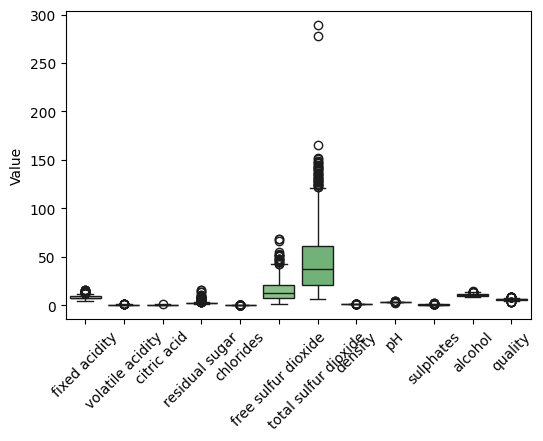

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(6, 4))
sns.boxplot(data=wine, palette="Greens")  # This applies the green palette directly

plt.xticks(rotation=45)  # Rotate x-tick labels for better readability
plt.ylabel('Value')
plt.show()


In [7]:
# Show the distribution of 'quality'

pd.DataFrame(wine['quality'].value_counts())

,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


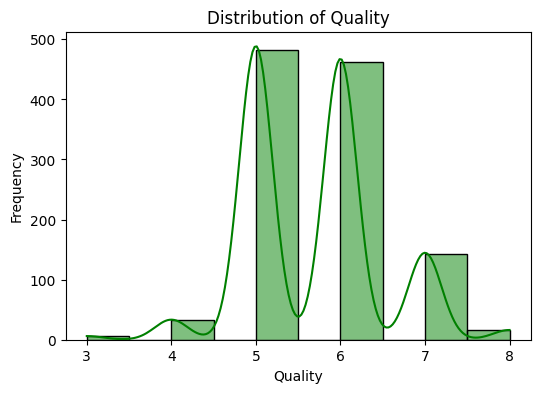

In [8]:
# Show the distribution of 'quality' as a histogram using Seaborne.

plt.figure(figsize=(6, 4))
sns.histplot(data=wine, x='quality', bins=10, kde=True, color='green')

plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Quality')
plt.show()

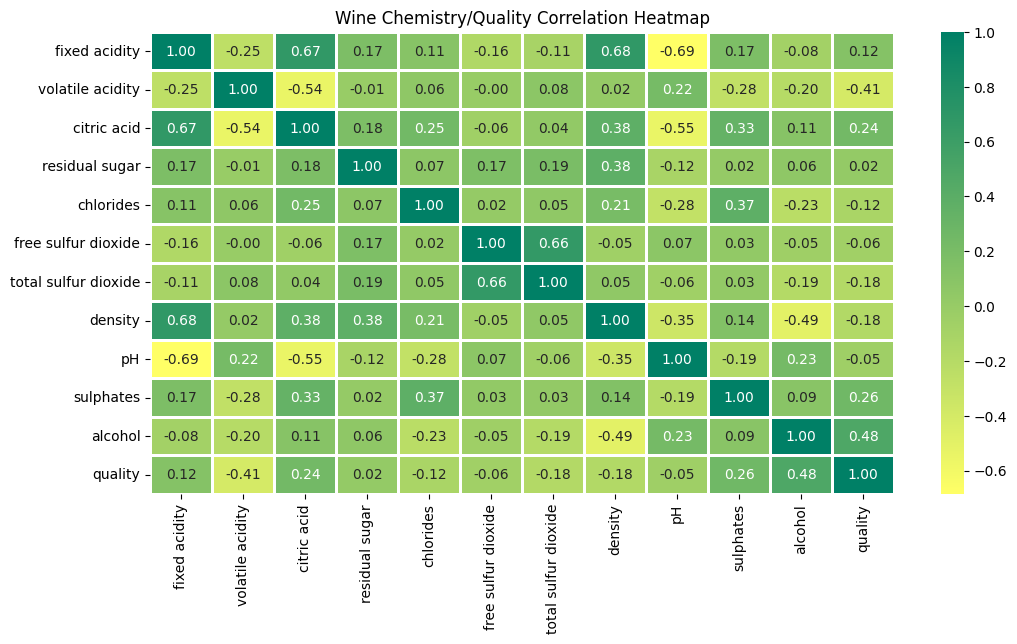

In [9]:
# plot a correlation chart of the features against the 'quality' target variable.

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = wine.corr()

# Identify features with correlation to 'quality' less than 0.2
# Use absolute value to consider both positive and negative correlations
features_to_keep = correlation_matrix.index[abs(correlation_matrix["quality"]) >= 0.2]

plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='summer_r',
            fmt='.2f',
            linewidths=2).set_title("Wine Chemistry/Quality Correlation Heatmap")
plt.show()

# Keep these features in the DataFrame, including the target variable 'quality'
wine = wine[features_to_keep]

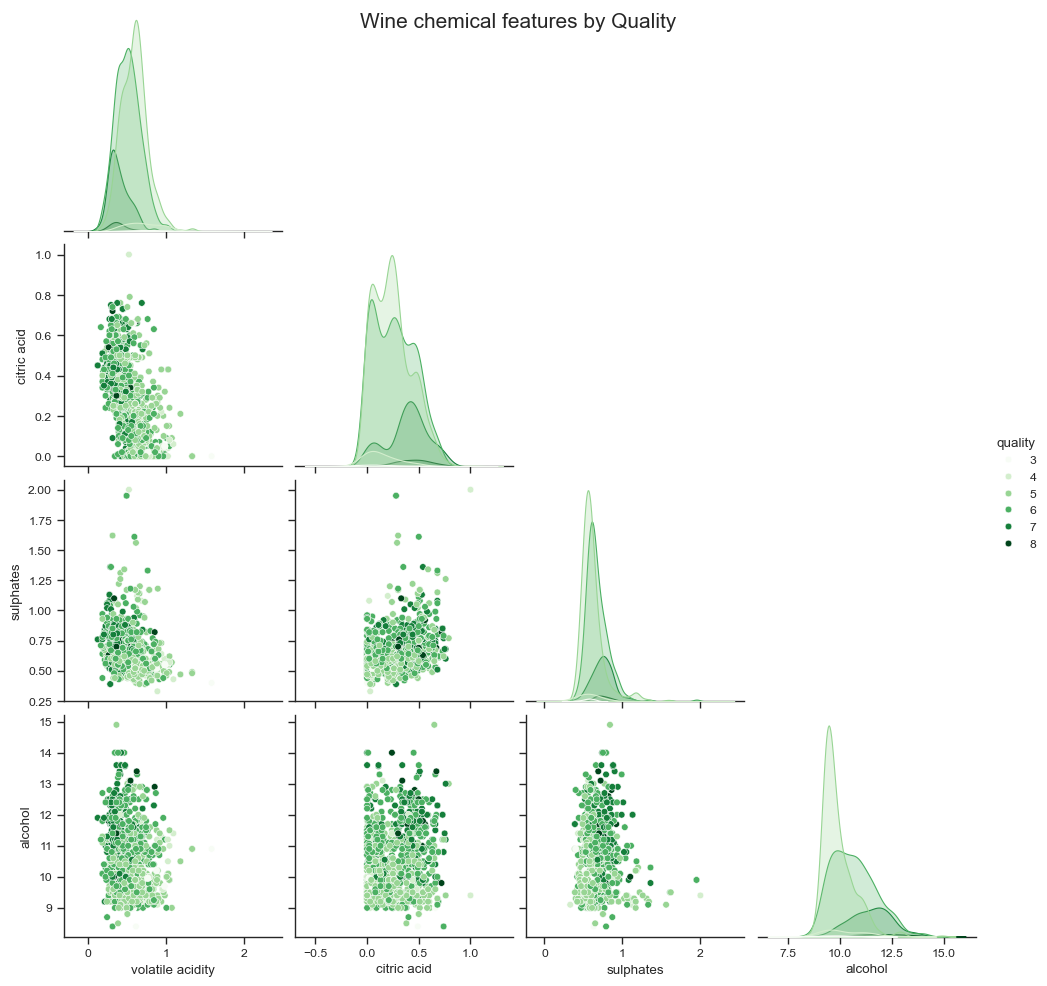

,volatile acidity,citric acid,sulphates,alcohol,quality
0,0.700,0.00,0.56,9.4,5
1,0.880,0.00,0.68,9.8,5
2,0.760,0.04,0.65,9.8,5
3,0.280,0.56,0.58,9.8,6
4,0.700,0.00,0.56,9.4,5
...,...,...,...,...,...
1138,0.510,0.13,0.75,11.0,6
1139,0.620,0.08,0.82,9.5,6
1140,0.600,0.08,0.58,10.5,5
1141,0.550,0.10,0.76,11.2,6


In [10]:
# Now let us chart a matrix of plots, with X vs Y between all features.
# This will effectively give us a chemical composition matrix, where the color of the plot will indicate the quality.

# Pair plot using seaborn
sns.set_theme(context="paper", style="ticks")  # Set the style of the visualization
pairplot = sns.pairplot(wine, hue="quality", palette="Greens", corner=True)

pairplot.figure.suptitle("Wine chemical features by Quality", size=15)
plt.show()

wine



In [11]:
wine_grouped_by_quality = wine.groupby('quality').mean()
wine_grouped_by_quality.reset_index(inplace=True)

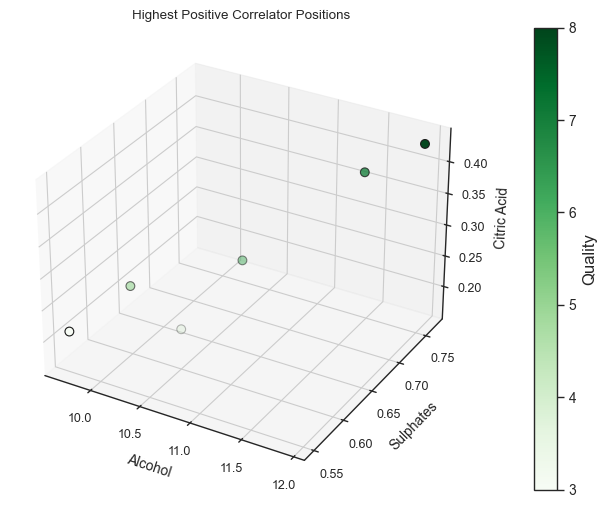

In [12]:

fig = plt.figure(figsize=(8, 6))  # Adjusting figure size
ax = fig.add_subplot(111, projection='3d')

# Normalize 'quality' values for color mapping
norm = plt.Normalize(wine_grouped_by_quality['quality'].min(), wine_grouped_by_quality['quality'].max())
colors = plt.get_cmap('Greens')(norm(wine_grouped_by_quality['quality']))

# 3D scatter plot
sc = ax.scatter(wine_grouped_by_quality['alcohol'], 
                wine_grouped_by_quality['sulphates'], 
                wine_grouped_by_quality['citric acid'], 
                c=colors, edgecolor='k', s=40, depthshade=True)

# Create a color bar with the correct mapping
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='Greens'), ax=ax, pad=0.1)
cbar.set_label('Quality', fontsize=12)
# Set font size for the color bar tick labels
cbar.ax.tick_params(labelsize=10)  # Adjust labelsize as needed

# Labels and title
ax.set_xlabel('Alcohol', fontsize=10)
ax.set_ylabel('Sulphates', fontsize=10)
ax.set_zlabel('Citric Acid', fontsize=10)
ax.set_title('Highest Positive Correlator Positions')

# Set font size for the tick labels on all axes
ax.tick_params(axis='both', which='major', labelsize=9)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.show()



Best regressor: KNeighbors with neg_mean_squared_error score: -0.38768439914783254, MSE: 0.38768439914783254, and parameters: {'KNeighbors__n_neighbors': 9, 'KNeighbors__weights': 'distance'}


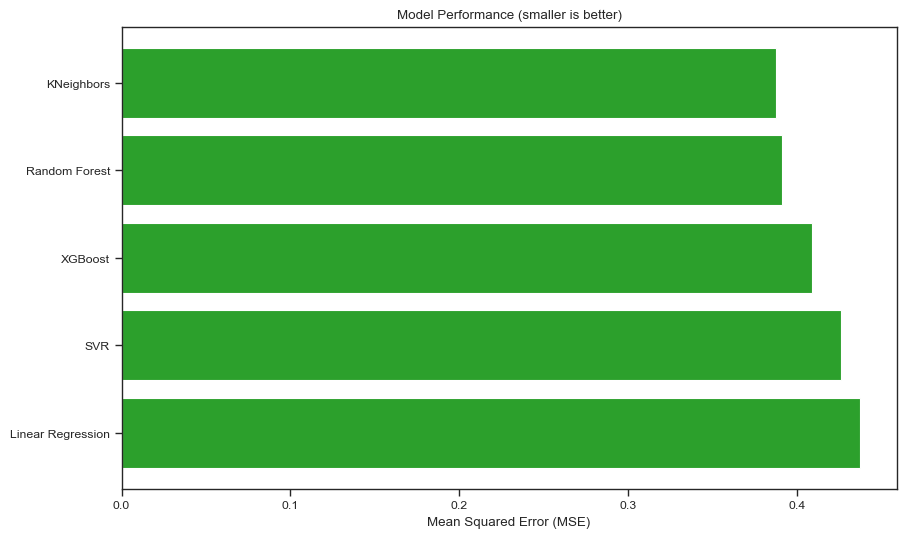

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import numpy as np

# Split 'wine' into features (X, all columns except quality) and target (y, only quality)
X = wine.drop('quality', axis=1)
y = wine['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and their respective parameter grids. Note that the parameter grid keys must be prefixed by the model name in the pipeline.
models_params = [
    ('Linear Regression', LinearRegression(), {}),
    ('Random Forest', RandomForestRegressor(), {
        'Random Forest__n_estimators': [10, 100, 200],
        'Random Forest__max_depth': [None, 10, 20, 30],
    }),
    ('SVR', SVR(), {
        'SVR__C': [0.1, 1, 10],
        'SVR__kernel': ['linear', 'rbf'],
    }),
    ('XGBoost', XGBRegressor(), {
        'XGBoost__n_estimators': [100, 200, 400, 800],
        'XGBoost__learning_rate': [0.005, 0.01, 0.1, 0.2],
        'XGBoost__max_depth': [3, 5, 7, 9],
        'XGBoost__seed': [42],
    }),
    ('KNeighbors', KNeighborsRegressor(), {
        'KNeighbors__n_neighbors': [3, 5, 7, 9],
        'KNeighbors__weights': ['uniform', 'distance'],
    })
]

best_score = float('-inf')
best_regressor = None
best_params = None
model_names = []
scores = []

for name, regressor, params in models_params:
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Scale features
        (name, regressor)  # Use the model name as the step name in the pipeline
    ])
    
    if params:
        # Perform hyperparameter tuning for models with a defined parameter grid
        grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        score = grid_search.best_score_
        params = grid_search.best_params_
    else:
        # For simplicity, directly evaluate models without a parameter grid
        score = np.mean(cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    
    # Store the model name and score
    model_names.append(name)
    scores.append(score)

    if score > best_score:
        best_score = score
        best_regressor = name
        best_params = params

# Calculate MSE by negating the best_score
mse = best_score * -1

print(f"Best regressor: {best_regressor} with neg_mean_squared_error score: {best_score}, MSE: {mse}, and parameters: {best_params}")

# Pair each model name with its score, sort by score, and then unzip back into separate lists
sorted_pairs = sorted(zip(scores, model_names), key=lambda x: x[0])

# Unzipping the sorted pairs
sorted_scores, sorted_model_names = zip(*sorted_pairs)

# Plotting the performance of each model with sorted values
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(sorted_model_names, [score * -1 for score in sorted_scores], color='#2CA02C')
ax.set_xlabel('Mean Squared Error (MSE)')
ax.set_title('Model Performance (smaller is better)')

plt.show()

Test MSE for the best regressor (KNeighbors): 0.3381499055639954
Residuals Summary Statistics:
count    229.000000
mean      -0.048154
std        0.580779
min       -2.233049
25%       -0.351151
50%        0.000000
75%        0.241689
max        1.923910
Name: quality, dtype: float64


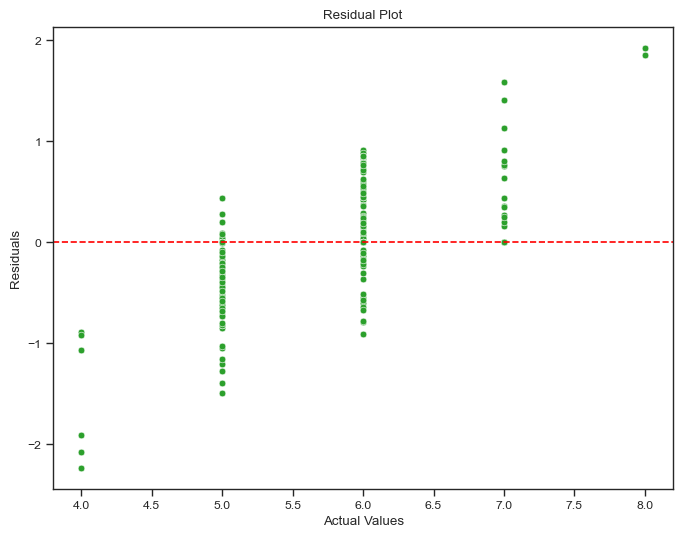

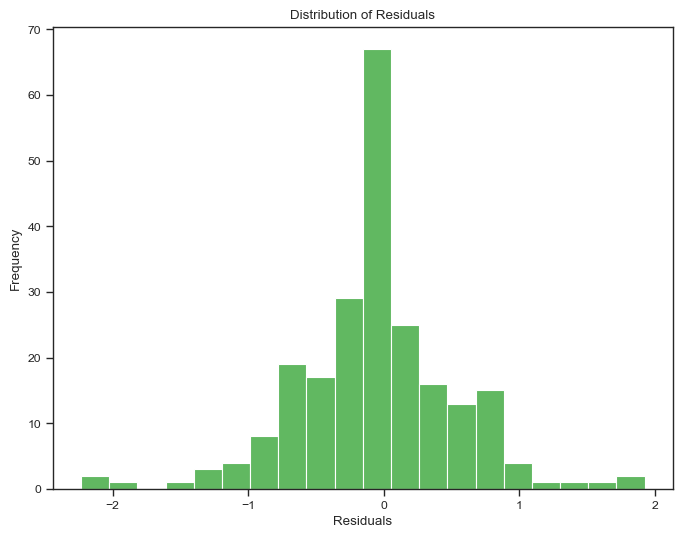

In [14]:
from sklearn.metrics import mean_squared_error

# Since you're using named steps in the pipeline, update `best_params` to work with `set_params`
best_params_updated = {key.replace(f'{best_regressor}__', '', 1): value for key, value in best_params.items()}

# Recreate the best pipeline with the best parameters
if best_regressor == 'Linear Regression':
    best_model = LinearRegression(**best_params_updated)
elif best_regressor == 'Random Forest':
    best_model = RandomForestRegressor(**best_params_updated)
elif best_regressor == 'SVR':
    best_model = SVR(**best_params_updated)
elif best_regressor == 'XGBoost':
    best_model = XGBRegressor(**best_params_updated)
elif best_regressor == 'KNeighbors':
    best_model = KNeighborsRegressor(**best_params_updated)

# Initialize the pipeline with the best model
best_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    (best_regressor, best_model)
])

# Retrain on the full training set
best_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = best_pipeline.predict(X_test)
residuals = y_test - y_pred

# Calculate and print the MSE on the test set for evaluation
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE for the best regressor ({best_regressor}): {test_mse}")

# Print summary statistics of the residuals
print("Residuals Summary Statistics:")
print(residuals.describe())

# Residual plot using seaborn and matplotlib
plt.figure(figsize=(8, 6))  # Set the figure size
sns.scatterplot(x=y_test, y=residuals, color='#2CA02C')
plt.axhline(y=0, linestyle='--', color='red')  # Adding a horizontal line at 0
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


# Histogram of residuals
plt.figure(figsize=(8, 6))  # Set the figure size
sns.histplot(residuals, kde=False, color='#2CA02C', bins=20)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()